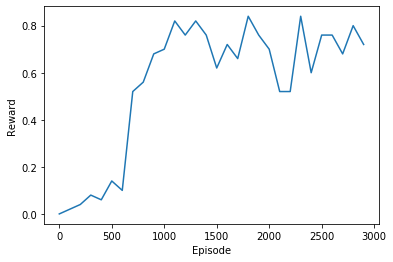

,Left,Down,Right,Up
1,0.727979,0.711906,0.704471,0.710774
2,0.487351,0.436969,0.448247,0.599015
3,0.466104,0.359877,0.335494,0.423084
4,0.213498,0.004373,0.028640,0.082553
5,0.727570,0.553901,0.622427,0.445124
6,0.000000,0.000000,0.000000,0.000000
7,0.231404,0.159007,0.255416,0.088964
8,0.000000,0.000000,0.000000,0.000000
9,0.317262,0.419839,0.442755,0.732121
10,0.368722,0.732121,0.471860,0.518076


Path contains infinite cycle.
[1, 1, 1]
0.498
RL Hw1 step 5 Score: 67.23


In [2]:
import gym
import numpy as np
from random import random, randrange
from pandas import DataFrame
import matplotlib.pyplot as plt

LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3

class RL_Q_learning():
    def __init__(self):
        self.lr=.12
        self.epsilon =.1
        self.Q=None
        self.maxNumSteps=6
        
    def take_action(self, state, close_epsilon):
        q=self.Q[state]
        if (close_epsilon or random() >= self.epsilon) and any(q):
            return np.argmax(q)
        else:
            return randrange(4)

    def start(self):
        env = gym.make('FrozenLake-v0')
        self.Q=np.zeros((env.observation_space.n,env.action_space.n))
        scoreHistory=[]
        scoreHistoryEpisode=[]
        nEpisode=3000
        for episode in range(nEpisode):
            observation=env.reset()
            done=False
            nStep=0
            while not done and nStep<self.maxNumSteps:
                chosenAction=self.take_action(observation, False)
                newObservation, reward, done, info = env.step(chosenAction)
                self.Q[observation,chosenAction]+=self.lr*(reward+max(self.Q[newObservation])-self.Q[observation,chosenAction])
                observation=newObservation
                ++nStep
            if episode % 100 == 0:
                testNtimes=50
                __score = 0
                for i in range(testNtimes):
                    state = env.reset()
                    while True:
                        action = self.take_action(state, close_epsilon=True)
                        next_state, reward, done, _ = env.step(action)
                        state = next_state
                        if done:
                            break
                    __score += reward
                __score /= testNtimes
                scoreHistory.append(__score)
                scoreHistoryEpisode.append(episode)
                #if __score > .8:
                #    break
        env.close()
        plt.plot(scoreHistoryEpisode,scoreHistory)
        plt.ylabel('Reward')
        plt.xlabel('Episode')
        plt.show()
        self.PrintQTable()
        self.PrintFinalPath()
        
    def PrintQTable(self):
        display(DataFrame(self.Q, index=list(range(1,17)) ,columns = ['Left','Down','Right','Up']))
        
    def PrintFinalPath(self):
        row,col=1,1
        def step(chosenAction):
            nonlocal row,col
            if   chosenAction==LEFT:
                col= max(1,col-1)
            elif chosenAction==DOWN:
                row= min(4,row+1)
            elif chosenAction==RIGHT:
                col= min(4,col+1)
            elif chosenAction==UP:
                row= max(1,row-1)
        
        done=False
        hg=[6,8,12,13,16]
        l=[]
        s=1
        while s not in hg:
            chosenAction=self.take_action(s-1, True)
            step(chosenAction)
            s=(row-1)*4+col
            l.append(s)
            if len(l)>=3 and l[-3]==s:
                print('Path contains infinite cycle.')
                break
        print(l)
        


if __name__ == '__main__':
    agent = RL_Q_learning()
    agent.start()

    import gym
    env = gym.make('FrozenLake-v0')
    __score = 0
    for i in range(1000):
        total_reward = 0
        state = env.reset()
        while True:
            action = agent.take_action(state, close_epsilon=True)
            next_state, reward, done, _ = env.step(action)
            state = next_state
            total_reward += reward
            if done:
                break
        __score += total_reward
    __score /= 1000
    print(__score)
    print("RL Hw1 step 5 Score:", min(__score * 135, 100))